In [10]:
from PyPDF2 import PdfReader, PdfWriter

input_pdf = r'C:\Users\Yash lichade\Downloads\Mobile_dataset.pdf'  # Your 162,000-page PDF
output_pdf = 'app_usaage.pdf'  # Output subset PDF

start_page, end_page = 3, 69  # Example: Extract pages 100 to 200

reader = PdfReader(input_pdf)
writer = PdfWriter()

for i in range(start_page, end_page + 1):
    writer.add_page(reader.pages[i])

with open(output_pdf, "wb") as f:
    writer.write(f)

print("Subset PDF saved as", output_pdf)

Subset PDF saved as app_usaage.pdf


In [11]:
import pdfplumber
import pandas as pd

# Path to the uploaded PDF
pdf_path = "app_usaage.pdf"

# Extract text from the PDF
extracted_text = ""
table_data = []

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            extracted_text += text + "\n"  # Store text
        tables = page.extract_tables()
        if tables:
            table_data.extend(tables)  # Store tables

# Display first 1000 characters of extracted text and first 2 tables if available
extracted_text[:1000], table_data[:2]

('5 com.sec.android.gallery Start time: com.samsung.android.g Additional info: Source: Samsung\n3d 13-02-2025 allery.app.activity.Galler Rubin\n17:10:30(UTC+5:30) yActivity\nAction:\nLaunch\nEnd time:\n13-02-2025\n17:11:29(UTC+5:30) Artifact Family:\n6 com.sec.android.app.la Start time: Additional info: Source: Samsung\nuncher 13-02-2025 Source Class: Wellbeing\n11:40:31(UTC+0) com.android.launcher3.uio\nverrides.QuickstepLaunche\nr\nEnd time:\nAction:\nClose\nArtifact Family:\n7 com.sec.android.gallery Start time: Additional info: Source: Samsung\n3d 13-02-2025 Source Class: Wellbeing\n11:41:29(UTC+0) com.samsung.android.gall\nery.app.activity.GalleryActi\nvity\nEnd time:\nAction:\nSendToBackground\nArtifact Family:\n8 android Start time: Additional info: Source: Samsung\n13-02-2025 Source Class: Wellbeing\n11:41:29(UTC+0) com.android.internal.app.C\nhooserActivity\nEnd time:\nAction:\nBringToFocus\nArtifact Family:\n9 android Start time: Additional info: Source: Samsung\n13-02-2025 S

In [12]:
# Flatten the extracted table data
flattened_data = [row for table in table_data for row in table]

# Define column names based on observed structure
columns = ["ID", "App Name", "Start-End Time", "Source Class", "Additional Info", "Source", "Empty"]

# Convert to DataFrame
df_app_usage = pd.DataFrame(flattened_data, columns=columns)

# Drop unnecessary columns
df_app_usage.drop(columns=["ID", "Empty"], inplace=True)

# Display cleaned data
df_app_usage.head(10)

,App Name,Start-End Time,Source Class,Additional Info,Source
0,com.sec.android.gallery\n3d,Start time:\n13-02-2025\n17:10:30(UTC+5:30)\nE...,com.samsung.android.g\nallery.app.activity.Gal...,Additional info:\nAction:\nLaunch\nArtifact Fa...,Source: Samsung\nRubin
1,com.sec.android.app.la\nuncher,Start time:\n13-02-2025\n11:40:31(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.android.l...,Source: Samsung\nWellbeing
2,com.sec.android.gallery\n3d,Start time:\n13-02-2025\n11:41:29(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.samsung.a...,Source: Samsung\nWellbeing
3,android,Start time:\n13-02-2025\n11:41:29(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.android.i...,Source: Samsung\nWellbeing
4,android,Start time:\n13-02-2025\n11:41:46(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.android.i...,Source: Samsung\nWellbeing
5,com.instagram.android,Start time:\n13-02-2025\n11:41:46(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.instagram...,Source: Samsung\nWellbeing
6,com.instagram.android,Start time:\n13-02-2025\n11:41:46(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.instagram...,Source: Samsung\nWellbeing
7,com.instagram.android,Start time:\n13-02-2025\n11:41:46(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.instagram...,Source: Samsung\nWellbeing
8,com.instagram.android,Start time:\n13-02-2025\n17:11:46(UTC+5:30)\nE...,com.instagram.modal.Tr\nansparentModalActivity,Additional info:\nAction:\nLaunch\nArtifact Fa...,Source: Samsung\nRubin
9,com.sec.android.gallery\n3d,Start time:\n13-02-2025\n11:41:48(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.samsung.a...,Source: Samsung\nWellbeing


In [13]:
df_app_usage.tail(100)

,App Name,Start-End Time,Source Class,Additional Info,Source
600,com.dubox.drive,Start time:\n17-02-2025\n14:20:06(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.dubox.dri...,Source: Samsung\nWellbeing
601,com.dubox.drive,Start time:\n17-02-2025\n14:20:06(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.dubox.dri...,Source: Samsung\nWellbeing
602,com.dubox.drive,Start time:\n17-02-2025\n14:20:06(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.dubox.dri...,Source: Samsung\nWellbeing
603,com.dubox.drive,Start time:\n17-02-2025\n14:20:07(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.dubox.dri...,Source: Samsung\nWellbeing
604,com.dubox.drive,Start time:\n17-02-2025\n14:20:07(UTC+0)\nEnd ...,,Additional info:\nSource Class:\ncom.dubox.dri...,Source: Samsung\nWellbeing
...,...,...,...,...,...
695,,None,None,None,None
696,,None,None,None,None
697,,None,None,None,None
698,,None,None,None,None


In [14]:
df_app_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   App Name         700 non-null    object
 1   Start-End Time   649 non-null    object
 2   Source Class     649 non-null    object
 3   Additional Info  649 non-null    object
 4   Source           649 non-null    object
dtypes: object(5)
memory usage: 27.5+ KB


In [15]:
import pandas as pd
import re

# Remove newline characters and extra spaces
df_app_usage["Start-End Time"] = df_app_usage["Start-End Time"].str.replace("\n", " ").str.strip()

# Extract Start Time and End Time (without UTC info)
df_app_usage["Start Time"] = df_app_usage["Start-End Time"].str.extract(r'Start time:\s*([\d-]+\s[\d:]+)')
df_app_usage["End Time"] = df_app_usage["Start-End Time"].str.extract(r'End time:\s*([\d-]+\s[\d:]+)')

# Convert Start Time & End Time to datetime
df_app_usage["Start Time"] = pd.to_datetime(df_app_usage["Start Time"], format="%d-%m-%Y %H:%M:%S", errors='coerce')
df_app_usage["End Time"] = pd.to_datetime(df_app_usage["End Time"], format="%d-%m-%Y %H:%M:%S", errors='coerce')

# If End Time is missing, assume Start Time + 1 min
df_app_usage["End Time"].fillna(df_app_usage["Start Time"] + pd.Timedelta(minutes=1), inplace=True)

# Keep only relevant columns
df_app_usage = df_app_usage[["App Name", "Start Time", "End Time"]]

# Show updated DataFrame
print(df_app_usage.head(10))

                         App Name          Start Time            End Time
0     com.sec.android.gallery\n3d 2025-02-13 17:10:30 2025-02-13 17:11:29
1  com.sec.android.app.la\nuncher 2025-02-13 11:40:31 2025-02-13 11:41:31
2     com.sec.android.gallery\n3d 2025-02-13 11:41:29 2025-02-13 11:42:29
3                         android 2025-02-13 11:41:29 2025-02-13 11:42:29
4                         android 2025-02-13 11:41:46 2025-02-13 11:42:46
5           com.instagram.android 2025-02-13 11:41:46 2025-02-13 11:42:46
6           com.instagram.android 2025-02-13 11:41:46 2025-02-13 11:42:46
7           com.instagram.android 2025-02-13 11:41:46 2025-02-13 11:42:46
8           com.instagram.android 2025-02-13 17:11:46 2025-02-13 17:12:50
9     com.sec.android.gallery\n3d 2025-02-13 11:41:48 2025-02-13 11:42:48


C:\Users\Yash lichade\AppData\Local\Temp\ipykernel_8636\3230678382.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app_usage["End Time"].fillna(df_app_usage["Start Time"] + pd.Timedelta(minutes=1), inplace=True)


In [16]:
df_app_usage.head(10)

,App Name,Start Time,End Time
0,com.sec.android.gallery\n3d,2025-02-13 17:10:30,2025-02-13 17:11:29
1,com.sec.android.app.la\nuncher,2025-02-13 11:40:31,2025-02-13 11:41:31
2,com.sec.android.gallery\n3d,2025-02-13 11:41:29,2025-02-13 11:42:29
3,android,2025-02-13 11:41:29,2025-02-13 11:42:29
4,android,2025-02-13 11:41:46,2025-02-13 11:42:46
5,com.instagram.android,2025-02-13 11:41:46,2025-02-13 11:42:46
6,com.instagram.android,2025-02-13 11:41:46,2025-02-13 11:42:46
7,com.instagram.android,2025-02-13 11:41:46,2025-02-13 11:42:46
8,com.instagram.android,2025-02-13 17:11:46,2025-02-13 17:12:50
9,com.sec.android.gallery\n3d,2025-02-13 11:41:48,2025-02-13 11:42:48


In [7]:
import pandas as pd

# Calculate usage duration per session
df_app_usage["Usage Duration (mins)"] = (df_app_usage["End Time"] - df_app_usage["Start Time"]).dt.total_seconds() / 60

# Sum up total usage per app
most_used_apps = df_app_usage.groupby("App Name")["Usage Duration (mins)"].sum().reset_index()

# Sort by highest usage
most_used_apps = most_used_apps.sort_values(by="Usage Duration (mins)", ascending=False)

# Display Top 10 most used apps
print("📊 Most Used Apps:")
print(most_used_apps.head(10))

📊 Most Used Apps:
                           App Name  Usage Duration (mins)
9              com.reddit.frontpage             295.783333
6                   com.dubox.drive             182.283333
12   com.sec.android.app.la\nuncher              64.000000
14           org.telegram.messenger              47.016667
8             com.instagram.android              33.216667
10  com.samsung.android.\nmessaging              15.050000
5                 com.brave.browser               6.033333
7          com.google.android.gm\ns               6.000000
13      com.sec.android.gallery\n3d               3.916667
4              com.android.settings               3.116667


C:\Users\Yash lichade\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


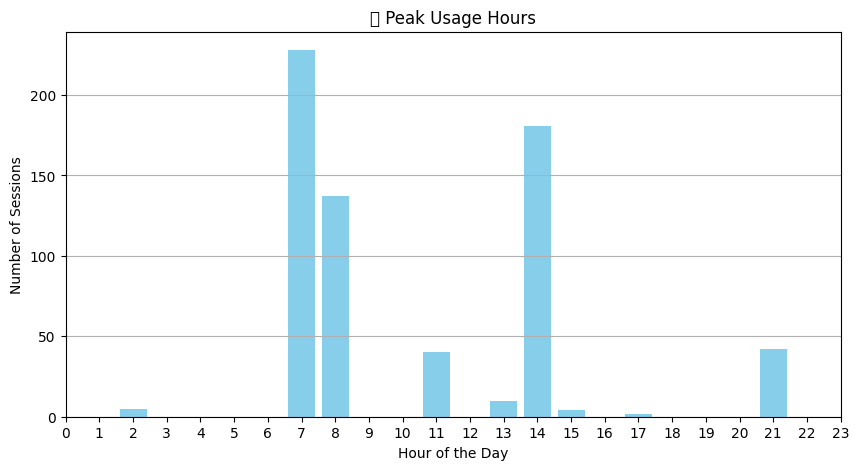

In [8]:
import matplotlib.pyplot as plt

# Extract hour from Start Time
df_app_usage["Hour"] = df_app_usage["Start Time"].dt.hour

# Count usage occurrences per hour
peak_usage_hours = df_app_usage["Hour"].value_counts().sort_index()

# 📊 Plot peak usage hours
plt.figure(figsize=(10, 5))
plt.bar(peak_usage_hours.index, peak_usage_hours.values, color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sessions")
plt.title("📊 Peak Usage Hours")
plt.xticks(range(0, 24))
plt.grid(axis="y")
plt.show()

In [9]:
# Sort data by Start Time
df_app_usage = df_app_usage.sort_values(by="Start Time")

# Calculate time gap between consecutive app sessions
df_app_usage["Time Gap (mins)"] = df_app_usage["Start Time"].diff().dt.total_seconds() / 60

# Detect frequent switching (less than 1 minute gap)
frequent_switching = df_app_usage[df_app_usage["Time Gap (mins)"] < 1]

# Display top instances of frequent switching
print("📊 Frequent App Switching Detected:")
print(frequent_switching.head(10))

📊 Frequent App Switching Detected:
                       App Name          Start Time            End Time  \
2   com.sec.android.gallery\n3d 2025-02-13 11:41:29 2025-02-13 11:42:29   
3                       android 2025-02-13 11:41:29 2025-02-13 11:42:29   
4                       android 2025-02-13 11:41:46 2025-02-13 11:42:46   
5         com.instagram.android 2025-02-13 11:41:46 2025-02-13 11:42:46   
6         com.instagram.android 2025-02-13 11:41:46 2025-02-13 11:42:46   
7         com.instagram.android 2025-02-13 11:41:46 2025-02-13 11:42:46   
9   com.sec.android.gallery\n3d 2025-02-13 11:41:48 2025-02-13 11:42:48   
10                      android 2025-02-13 11:41:48 2025-02-13 11:42:48   
15        com.instagram.android 2025-02-13 11:42:02 2025-02-13 11:43:02   
14        com.instagram.android 2025-02-13 11:42:02 2025-02-13 11:43:02   

    Usage Duration (mins)  Hour  Time Gap (mins)  
2                     1.0  11.0         0.966667  
3                     1.0  11.0      

In [10]:
# Filter sessions between 12 AM - 6 AM
late_night_usage = df_app_usage[(df_app_usage["Hour"] >= 0) & (df_app_usage["Hour"] <= 6)]

# Display results
print("🌙 Late Night Usage Detected:")
print(late_night_usage.head(10))

🌙 Late Night Usage Detected:
                           App Name          Start Time            End Time  \
43  com.samsung.android.\nmessaging 2025-02-14 02:40:33 2025-02-14 02:40:36   
51            com.instagram.android 2025-02-14 02:40:41 2025-02-14 02:41:35   
59           org.telegram.messenger 2025-02-14 02:41:41 2025-02-14 02:43:14   
69                  com.dubox.drive 2025-02-14 02:43:16 2025-02-14 02:44:13   
82            com.instagram.android 2025-02-14 02:44:13 2025-02-14 02:45:17   

    Usage Duration (mins)  Hour  Time Gap (mins)  
43               0.050000   2.0       325.033333  
51               0.900000   2.0         0.133333  
59               1.550000   2.0         1.000000  
69               0.950000   2.0         1.583333  
82               1.066667   2.0         0.950000  


C:\Users\Yash lichade\AppData\Local\Temp\ipykernel_6696\2928906557.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_used_apps.head(10)["Usage Duration (mins)"], y=most_used_apps.head(10)["App Name"], palette="coolwarm")
C:\Users\Yash lichade\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


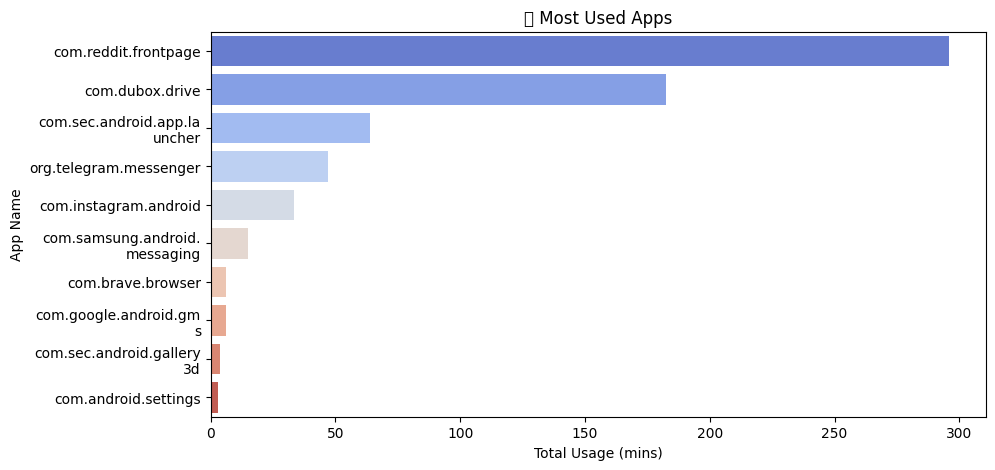

C:\Users\Yash lichade\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


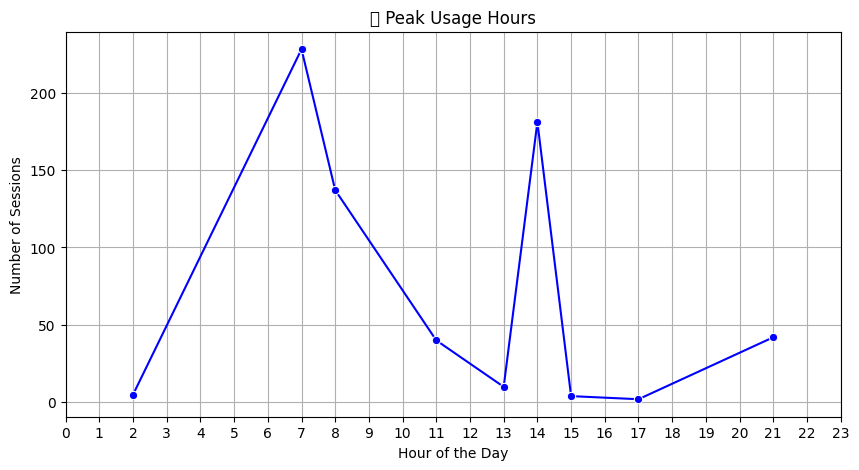

C:\Users\Yash lichade\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


📊 Frequent App Switching Detected:
                       App Name          Start Time  Time Gap (mins)
2   com.sec.android.gallery\n3d 2025-02-13 11:41:29         0.966667
3                       android 2025-02-13 11:41:29         0.000000
4                       android 2025-02-13 11:41:46         0.283333
5         com.instagram.android 2025-02-13 11:41:46         0.000000
6         com.instagram.android 2025-02-13 11:41:46         0.000000
7         com.instagram.android 2025-02-13 11:41:46         0.000000
9   com.sec.android.gallery\n3d 2025-02-13 11:41:48         0.033333
10                      android 2025-02-13 11:41:48         0.000000
13        com.instagram.android 2025-02-13 11:42:02         0.233333
12        com.instagram.android 2025-02-13 11:42:02         0.000000


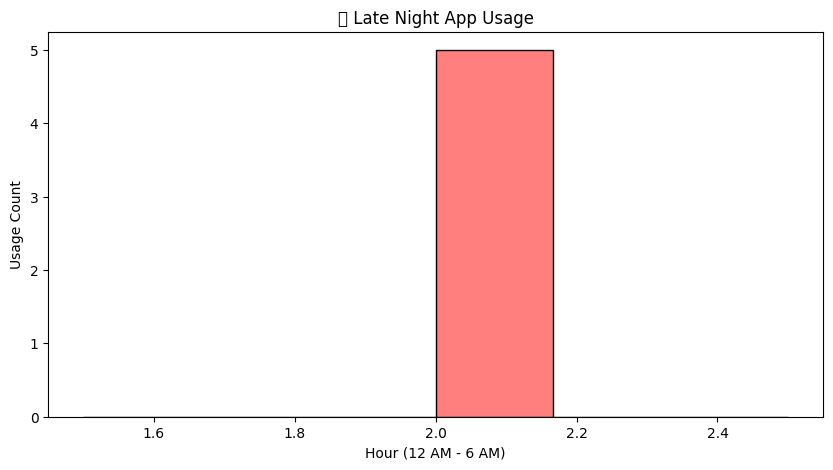

C:\Users\Yash lichade\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


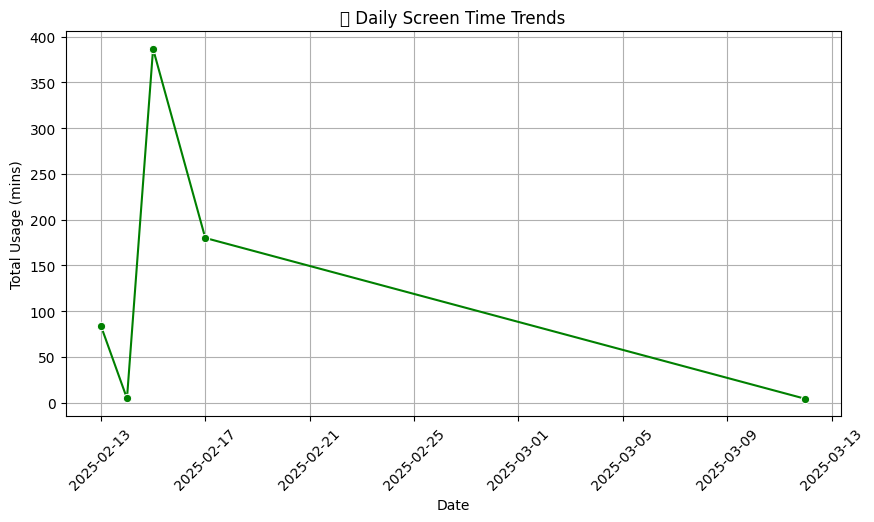

C:\Users\Yash lichade\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


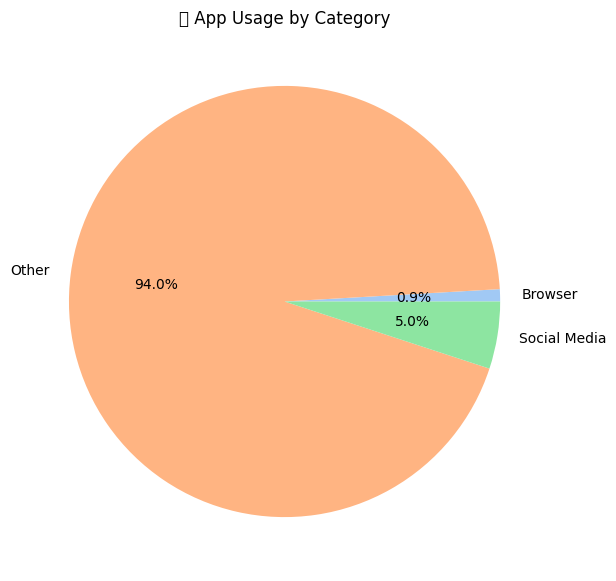

📊 Longest App Sessions:
                   App Name          Start Time  Usage Duration (mins)
175    com.reddit.frontpage 2025-02-15 13:24:55              10.783333
129  org.telegram.messenger 2025-02-15 13:16:15               3.883333
167   com.instagram.android 2025-02-15 13:22:41               2.183333
138  org.telegram.messenger 2025-02-15 13:20:11               1.716667
647    com.android.settings 2025-03-12 15:14:35               1.633333
59   org.telegram.messenger 2025-02-14 02:41:41               1.550000
82    com.instagram.android 2025-02-14 02:44:13               1.066667
8     com.instagram.android 2025-02-13 17:11:46               1.066667
443    com.reddit.frontpage 2025-02-15 08:04:19               1.000000
442    com.reddit.frontpage 2025-02-15 08:04:19               1.000000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openai  # Install via `pip install openai`

# # Load App Usage Data (Ensure your dataframe is named df_app_usage)
# # df_app_usage = pd.read_csv("your_cleaned_data.csv")  # Uncomment if using CSV

# # Convert Start & End Time to datetime format
# df_app_usage["Start Time"] = pd.to_datetime(df_app_usage["Start Time"])
# df_app_usage["End Time"] = pd.to_datetime(df_app_usage["End Time"])

# # Calculate Usage Duration in Minutes
# df_app_usage["Usage Duration (mins)"] = (df_app_usage["End Time"] - df_app_usage["Start Time"]).dt.total_seconds() / 60

### 📌 1️⃣ Most Used Apps
most_used_apps = df_app_usage.groupby("App Name")["Usage Duration (mins)"].sum().reset_index()
most_used_apps = most_used_apps.sort_values(by="Usage Duration (mins)", ascending=False)

# 📊 Visualization: Most Used Apps
plt.figure(figsize=(10, 5))
sns.barplot(x=most_used_apps.head(10)["Usage Duration (mins)"], y=most_used_apps.head(10)["App Name"], palette="coolwarm")
plt.xlabel("Total Usage (mins)")
plt.ylabel("App Name")
plt.title("📊 Most Used Apps")
plt.show()

### 📌 2️⃣ Peak Usage Hours
df_app_usage["Hour"] = df_app_usage["Start Time"].dt.hour
peak_usage_hours = df_app_usage["Hour"].value_counts().sort_index()

# 📊 Visualization: Peak Usage Hours
plt.figure(figsize=(10, 5))
sns.lineplot(x=peak_usage_hours.index, y=peak_usage_hours.values, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sessions")
plt.title("📊 Peak Usage Hours")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

### 📌 3️⃣ Frequent App Switching
df_app_usage = df_app_usage.sort_values(by="Start Time")
df_app_usage["Time Gap (mins)"] = df_app_usage["Start Time"].diff().dt.total_seconds() / 60
frequent_switching = df_app_usage[df_app_usage["Time Gap (mins)"] < 1]  # Less than 1 min gap

# Display Frequent Switching Data
print("📊 Frequent App Switching Detected:")
print(frequent_switching[["App Name", "Start Time", "Time Gap (mins)"]].head(10))

### 📌 4️⃣ Late Night Usage (12 AM - 6 AM)
late_night_usage = df_app_usage[(df_app_usage["Hour"] >= 0) & (df_app_usage["Hour"] <= 6)]

# 📊 Visualization: Late Night Usage
plt.figure(figsize=(10, 5))
sns.histplot(late_night_usage["Hour"], bins=6, kde=True, color="red")
plt.xlabel("Hour (12 AM - 6 AM)")
plt.ylabel("Usage Count")
plt.title("🌙 Late Night App Usage")
plt.show()

### 📌 5️⃣ Daily Screen Time Trends
df_app_usage["Date"] = df_app_usage["Start Time"].dt.date
daily_usage = df_app_usage.groupby("Date")["Usage Duration (mins)"].sum()

# 📊 Visualization: Daily Screen Time
plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_usage.index, y=daily_usage.values, marker="o", color="green")
plt.xlabel("Date")
plt.ylabel("Total Usage (mins)")
plt.title("📊 Daily Screen Time Trends")
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 📌 6️⃣ App Category Breakdown
app_categories = {
    "Social Media": ["com.instagram.android", "com.facebook.katana", "com.twitter.android", "com.snapchat.android"],
    "Productivity": ["com.google.android.gm", "com.microsoft.office.word", "com.microsoft.office.excel"],
    "Gaming": ["com.pubg.krmobile", "com.mojang.minecraftpe"],
    "Browser": ["com.android.chrome", "com.brave.browser"],
}

df_app_usage["Category"] = "Other"
for category, apps in app_categories.items():
    df_app_usage.loc[df_app_usage["App Name"].isin(apps), "Category"] = category

category_usage = df_app_usage.groupby("Category")["Usage Duration (mins)"].sum()

# 📊 Visualization: App Category Breakdown
plt.figure(figsize=(7, 7))
plt.pie(category_usage, labels=category_usage.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("📊 App Usage by Category")
plt.show()

### 📌 7️⃣ Longest Single App Sessions
longest_sessions = df_app_usage.sort_values(by="Usage Duration (mins)", ascending=False).head(10)

# Display Longest Sessions
print("📊 Longest App Sessions:")
print(longest_sessions[["App Name", "Start Time", "Usage Duration (mins)"]])


In [14]:
import ollama

# Prepare Data for LLM Analysis
insights_data = f"""
Most Used Apps:
{most_used_apps.head(5).to_string()}

Peak Usage Hours:
{peak_usage_hours.to_string()}

Frequent App Switching:
{frequent_switching.head(5).to_string()}

Late Night Usage:
{late_night_usage.head(5).to_string()}

Daily Screen Time Trends:
{daily_usage.tail(5).to_string()}

App Category Breakdown:
{category_usage.to_string()}
"""

# Call Ollama (Using Mistral or Any Local Model)
response = ollama.chat(
    model="mistral",  # Use "mistral" or any installed model like "llama2"
    messages=[{"role": "user", "content": f"Analyze the following app usage data and provide key behavioral insights:\n\n{insights_data}"}]
)

# Print LLM Behavioral Summary
print("📊 Ollama LLM Behavioral Insights:")
print(response["message"])

ResponseError: model "mistral" not found, try pulling it first (status code: 404)

SyntaxError: invalid syntax (817928879.py, line 1)